In [1]:
import sys
sys.path.append('../..')

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
import matplotlib as mpl
import seaborn as sns

from scipy import stats

import src.visualizor

In [2]:
df = pd.read_csv('../../data/processed/data.csv')

C:\Users\marcu\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3418: DtypeWarning: Columns (18,22) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
X = df
X = X[X.commentDateOffset < 0]

agg = X.groupby(['videoId', 'tconst', 'primaryTitle']).agg(
    numComments=('commentId', 'count'),
    sentiment=('sentimentPredictedScore', 'mean'),
    averageRating=('averageRating', 'mean'),
).reset_index()

agg = agg[agg.numComments >= 100]

threshold = agg.sentiment.median()
mask = agg.sentiment <= threshold

agg_hi = agg[~mask]
agg_lo = agg[mask]

In [4]:
hist_params = {
    'alpha': .4,
    'density': True
}

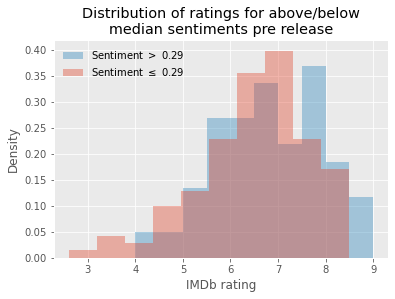

In [19]:
fig, ax = plt.subplots()
ax.hist(agg_hi.averageRating, **hist_params, label=f'Sentiment $>$ {round(threshold, 2)}')
ax.hist(agg_lo.averageRating, **hist_params, label=f'Sentiment $\leq$ {round(threshold, 2)}')
ax.set_title('Distribution of ratings for above/below\nmedian sentiments pre release')
ax.set_xlabel('IMDb rating')
ax.set_ylabel('Density')
ax.legend()

In [20]:
fig.savefig('../../reports/figs/stat_hist.svg')

In [6]:
stats.ttest_ind(agg_lo.averageRating, agg_hi.averageRating, alternative='less')

Ttest_indResult(statistic=-1.921023290494741, pvalue=0.02796677061644542)